In [13]:
pip install ucimlrepo

https://archive.ics.uci.edu/dataset/19/car+evaluation

In [14]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

In [15]:
# variable information
print(car_evaluation.variables)

       name     role         type demographic  \
0    buying  Feature  Categorical        None   
1     maint  Feature  Categorical        None   
2     doors  Feature  Categorical        None   
3   persons  Feature  Categorical        None   
4  lug_boot  Feature  Categorical        None   
5    safety  Feature  Categorical        None   
6     class   Target  Categorical        None   

                                         description units missing_values  
0                                       buying price  None             no  
1                           price of the maintenance  None             no  
2                                    number of doors  None             no  
3              capacity in terms of persons to carry  None             no  
4                           the size of luggage boot  None             no  
5                        estimated safety of the car  None             no  
6  evaulation level (unacceptable, acceptable, go...  None             no  

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [17]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


# Feature Scaling


In [18]:
X_bin = pd.DataFrame(index=X.index)

Buying is a feature representing buying price from low to very high.
We will use nominal scaling to binarize it.


In [19]:
X['buying'].value_counts()

,count
buying,
vhigh,432
high,432
med,432
low,432


In [20]:
X_bin['vhigh_price'] = (X['buying'] == 'vhigh').astype(int)
X_bin['high_price'] = (X['buying'] == 'high').astype(int)
X_bin['med_price'] = (X['buying'] == 'med').astype(int)
X_bin['low_price'] = (X['buying'] == 'low').astype(int)

Similarly we binarize the price of the maintenance represented by maint feature

In [21]:
X['maint'].value_counts()

,count
maint,
vhigh,432
high,432
med,432
low,432


In [22]:
X_bin['vhigh_maint'] = (X['maint'] == 'vhigh').astype(int)
X_bin['high_maint'] = (X['maint'] == 'high').astype(int)
X_bin['med_maint'] = (X['maint'] == 'med').astype(int)
X_bin['low_maint'] = (X['maint'] == 'low').astype(int)

For features representing the number of doors and capacity in terms of persons to carry we use ordinal scale.


In [23]:
X['doors'].value_counts()

,count
doors,
2,432
3,432
4,432
5more,432


In [24]:
X_bin['5+_doors'] = (X['doors'] == '5more').astype(int)
X_bin['4+_doors'] = X['doors'].apply(lambda x: x in ['4','5more']).astype(int)
X_bin['3+_doors'] = X['doors'].apply(lambda x: x in ['3', '4','5more']).astype(int)
X_bin['2+_doors'] = X['doors'].apply(lambda x: x in ['2', '3', '4','5more']).astype(int)

In [25]:
X['persons'].value_counts()

,count
persons,
2,576
4,576
more,576


In [26]:
X_bin['5+_persons'] = (X['persons'] == 'more').astype(int)
X_bin['4+_persons'] = X['persons'].apply(lambda x: x in ['4','more']).astype(int)
X_bin['2+_persons'] = X['persons'].apply(lambda x: x in ['2', '4','more']).astype(int)

For features representig the size of luggage boot and estimated safety of the car we use Nominal Scale.

In [27]:
X['lug_boot'].value_counts()

,count
lug_boot,
small,576
med,576
big,576


In [28]:
X_bin['big_boot'] = (X['lug_boot'] == 'big').astype(int)
X_bin['med_boot'] = (X['lug_boot'] == 'med').astype(int)
X_bin['small_boot'] = (X['lug_boot'] == 'small').astype(int)

In [29]:
X['safety'].value_counts()

,count
safety,
low,576
med,576
high,576


In [30]:
X_bin['high_safety'] = (X['safety'] == 'high').astype(int)
X_bin['med_safety'] = (X['safety'] == 'med').astype(int)
X_bin['low_safety'] = (X['safety'] == 'low').astype(int)

In [31]:
X_bin.head()

,vhigh_price,high_price,med_price,low_price,vhigh_maint,high_maint,med_maint,low_maint,5+_doors,4+_doors,...,2+_doors,5+_persons,4+_persons,2+_persons,big_boot,med_boot,small_boot,high_safety,med_safety,low_safety
0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
3,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0


We will also binarize the target  

In [32]:
y_bin = y['class'].map({'unacc': 0, 'acc': 1, 'good': 1, 'vgood': 1})

In [33]:
# Split binarized features and target in train test sets
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, stratify=y, random_state=42)

# Lazy FCA Class

In [34]:
from typing import List, Any

class LazyFCAa:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series) -> None:
        self.X_train = X_train
        self.y_train = y_train

    def classify_sample(self, sample: pd.Series) -> Any:
        # Split X_train into positive and negative classes
        X_train_positive = self.X_train[self.y_train == 1]
        X_train_negative = self.X_train[self.y_train == 0]

        # Count matches for positive and negative classifiers
        positive_classifiers = sum((sample & pos_sample).equals(sample) for _, pos_sample in X_train_positive.iterrows())
        negative_classifiers = sum((sample & neg_sample).equals(sample) for _, neg_sample in X_train_negative.iterrows())

        # Return class based on classifier counts
        if positive_classifiers > negative_classifiers:
            print(f"sample {sample.name} is classified as positive")
            return 1
        elif negative_classifiers > positive_classifiers:
            print(f"sample {sample.name} is classified as negative")
            return 0
        else:
            print(f"sample {sample.name} is classified as positive default")
            return 1

    def predict(self, X_test: pd.DataFrame) -> List[Any]:
        return [self.classify_sample(sample) for _, sample in X_test.iterrows()]


In [35]:
 # Initialize and fit the classifier
classifier = LazyFCAa()
classifier.fit(X_train, y_train)

In [36]:
# Predict using the classifier
y_pred = classifier.predict(X_test)

sample 1696 is classified as positive
sample 906 is classified as negative
sample 524 is classified as negative
sample 1080 is classified as negative
sample 593 is classified as positive
sample 169 is classified as negative
sample 928 is classified as negative
sample 389 is classified as positive
sample 1500 is classified as positive default
sample 526 is classified as negative
sample 159 is classified as negative
sample 784 is classified as negative
sample 1072 is classified as positive default
sample 461 is classified as negative
sample 1283 is classified as positive
sample 711 is classified as negative
sample 644 is classified as positive default
sample 1438 is classified as positive
sample 273 is classified as negative
sample 145 is classified as negative
sample 216 is classified as negative
sample 924 is classified as negative
sample 985 is classified as positive
sample 979 is classified as positive
sample 1547 is classified as positive
sample 469 is classified as negative
sample 

In [56]:
f1_score(y_test, y_pred), accuracy_score(y_test, y_pred), precision_score(y_test, y_pred)

(0.7098976109215017, 0.7543352601156069, 0.5502645502645502)

# Other models


In [47]:
import xgboost as xgb

In [48]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

In [49]:
f1_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb)

(1.0, 1.0, 1.0)

In [50]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier = RandomForestClassifier(random_state=42)
RandomForestClassifier.fit(X_train, y_train)

y_pred_rf = RandomForestClassifier.predict(X_test)

f1_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf)


(0.9855072463768116, 0.9913294797687862, 0.9902912621359223)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

GradientBoostingClassifier = GradientBoostingClassifier(random_state=42)
GradientBoostingClassifier.fit(X_train, y_train)

y_pred_gb = GradientBoostingClassifier.predict(X_test)

f1_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_gb), precision_score(y_test, y_pred_gb)

(0.9765258215962441, 0.9855491329479769, 0.9541284403669725)

In [52]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression(random_state=42)
LogisticRegression.fit(X_train, y_train)

y_pred_lr = LogisticRegression.predict(X_test)

f1_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lr)

(0.9289099526066351, 0.9566473988439307, 0.9158878504672897)

In [53]:
model_scores = {
    'LazyFCAa': {
        'f1': f1_score(y_test, y_pred),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred)
    },
    'XGBoost': {
        'f1': f1_score(y_test, y_pred_xgb),
        'accuracy': accuracy_score(y_test, y_pred_xgb),
        'precision': precision_score(y_test, y_pred_xgb)
    },
    'Random Forest': {
        'f1': f1_score(y_test, y_pred_rf),
        'accuracy': accuracy_score(y_test, y_pred_rf),
        'precision': precision_score(y_test, y_pred_rf)
    },
    'Gradient Boosting': {
        'f1': f1_score(y_test, y_pred_gb),
        'accuracy': accuracy_score(y_test, y_pred_gb),
        'precision': precision_score(y_test, y_pred_gb)
    },
    'Logistic Regression': {
        'f1': f1_score(y_test, y_pred_lr),
        'accuracy': accuracy_score(y_test, y_pred_lr),
        'precision': precision_score(y_test, y_pred_lr)
    }
}

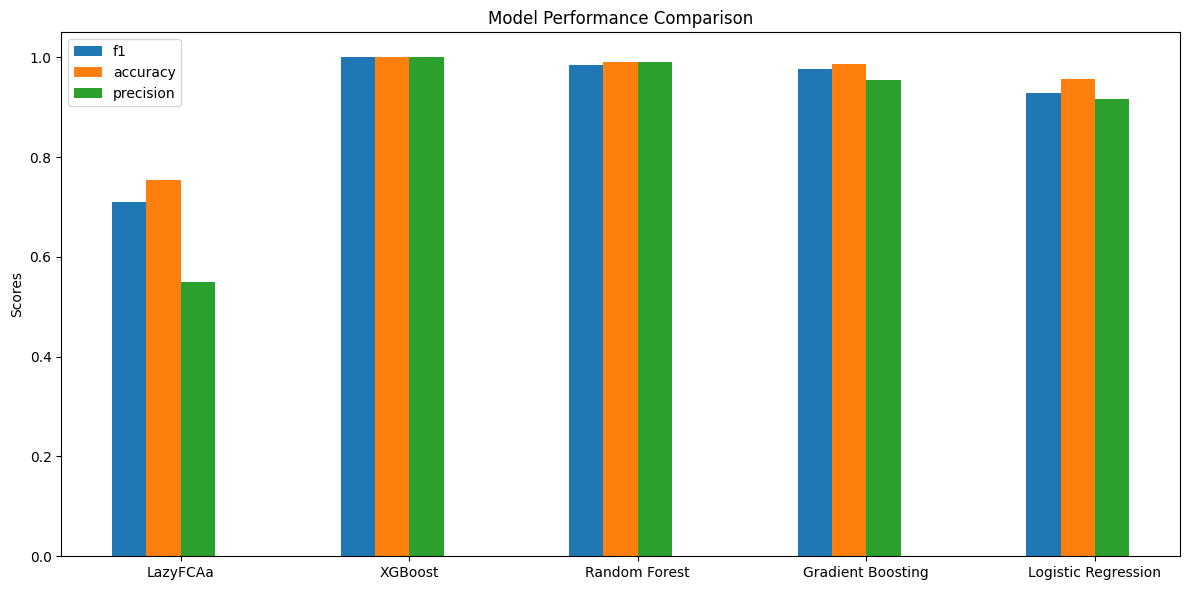

In [55]:
metrics = ['f1', 'accuracy', 'precision']
model_names = list(model_scores.keys())
x = np.arange(len(model_names))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, [model_scores[model][metric] for model in model_names], width, label=metric)


ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + (len(metrics) / 2) * width)
ax.set_xticklabels(model_names)
ax.legend()

fig.tight_layout()
plt.show()